**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

**Z-scores:**

Using the numpy, scipy.stats, and matplotlib libraries, write a function that calculates the z-scores for a dataset comprised of the following values.  

Calculate the mean, standard deviation, and Z-scores for the dataset.  
Plot the data and Z-scores on two separate dot plots.  
Upload screenshots of your output and plots.  

Note:  see Significance lecture modules for details on this question and the steps.  



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



[11 13 14 15 17 17 18 18 18 19 19 19 20 20 20 20 20 20 20 20 20]
Data mean: 18.0
Data standard deviation 2.581988897471611
-2.7 -1.9 -1.5 -1.2 -0.4 -0.4 0.0 0.0 0.0 0.4 0.4 0.4 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 
Z-score mean 0.0
Z-score standard deviation 1.0000000000000002


TestResults(failed=0, attempted=3)

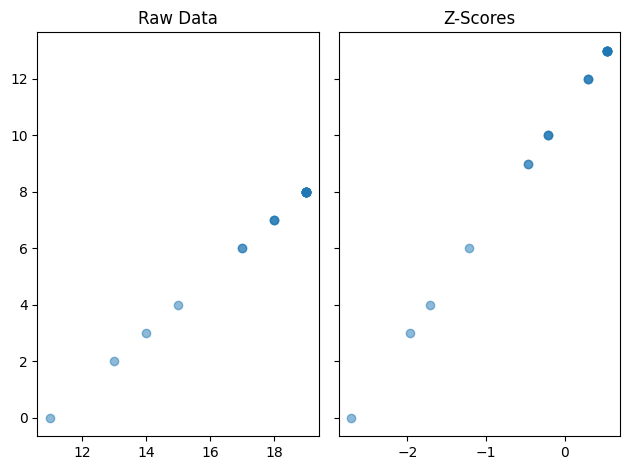

In [1]:
#Assignment - after Significance tests
#1 z-score calculation and plots from unit 030 example

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Calculate the z-score
# z-score tells us how many standard deviations away an individual value is from the mean
# calc mean and stddev then use stats lib functions to generate the zscores

#def calc_zscores(data1):
  #data1 is the input data list
  #return mean, standard deviation, and z-scores
  ####Your code here...
def calc_zscores(data):
    mean = np.mean(data)
    stddev = np.std(data)
    zscores = [(x - mean) / stddev for x in data]
    return mean, stddev, zscores


#Plot raw data and standardized data (zScores) on a dot plot using a mapped histogram
#Ref: https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot

def plot_dot(data1, zScores):
  #Uses matplot lib histogram to plot raw data and standardized scores (zScores)
  #NOTE:  This assumes input list of 21 points.  If this is changed then need to update
  #       binsStand, xStand for proper binning.
  #data1 is the raw input data
  #zScores are the computed standardized scores (zScores)

  # Plot the raw quiz scores and standardized quiz scores (i.e. z-scores) using a dotplot
  fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

  # Hint:
  # use np.arange, np.histogram, np.meshgrid, and matplotlib scatter functions

  ####Your code here...
def plot_dot(data, zScores):
    # Settings for the histogram
    binwidth = 1
    min1, max1 = np.min(data), np.max(data)
    min2, max2 = np.min(zScores), np.max(zScores)
    bins1 = np.arange(min1, max1 + binwidth, binwidth)
    bins2 = np.arange(min2, max2 + binwidth/4, binwidth/4) # finer binwidth for zScores

    # Plotting
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # Raw data
    counts1, _ = np.histogram(data, bins=bins1)
    y1 = np.repeat(np.arange(len(counts1)), counts1)
    x1 = np.hstack([np.repeat(bins1[i], count) for i, count in enumerate(counts1)])

    axs[0].scatter(x1, y1, alpha=0.5)
    axs[0].invert_yaxis() # invert y-axis to have higher values on top
    axs[0].set_title('Raw Data')

    # zScores
    counts2, _ = np.histogram(zScores, bins=bins2)
    y2 = np.repeat(np.arange(len(counts2)), counts2)
    x2 = np.hstack([np.repeat(bins2[i], count) for i, count in enumerate(counts2)])

    axs[1].scatter(x2, y2, alpha=0.5)
    axs[1].invert_yaxis() # invert y-axis to have higher values on top
    axs[1].set_title('Z-Scores')



#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=X)" where X is the number of tests.

import doctest

data = np.array([11, 13, 14, 15, 17, 17, 18, 18, 18, 19,
                  19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20])
dataMean, dataStddev, dataZscores = calc_zscores(data)
zScoreMean, zScoreStddev, dummy = calc_zscores(dataZscores)
plot_dot(data, dataZscores)

print(data)
print('Data mean:', dataMean)
print('Data standard deviation', dataStddev)
print('%1.1f '*len(dataZscores) % tuple(dataZscores))
print('Z-score mean', zScoreMean)
print('Z-score standard deviation', zScoreStddev)


"""
  >>> print('%.1f, %.2f' %(dataMean, dataStddev))
  18.0, 2.58
  >>> print('%1.1f '*len(dataZscores) % tuple(dataZscores))
  -2.7 -1.9 -1.5 -1.2 -0.4 -0.4 0.0 0.0 0.0 0.4 0.4 0.4 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8
  >>> print('%.1f, %.1f' %(zScoreMean, zScoreStddev))
  0.0, 1.0
"""

doctest.testmod()